Get Data on your Computer without big ckpt files:

    home/woAuchImmer/AML_project$ rsync -azP --exclude "*.ckpt" cluster:AML_project/_weights/ _weights/
    
with big ckpt files:
    
    home/woAuchImmer/AML_project$ rsync -azP cluster:AML_project/_weights/ _weights/


In [69]:
import numpy as np
import torch
import random
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import ipywidgets as widgets


# latex text in plots
usetex = False
if usetex:
    rc('text', usetex=True)
else:
    rc('text', usetex=False)

#change plt parameter globally 
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})



In [70]:
parent = "_weights"
files = os.listdir(parent)
jsons = []
for file in files:
    if "net_config.json" in file:
        jsons.append(file)
        
widget = widgets.SelectMultiple(
    options=jsons,
    rows=len(jsons),
    description='Trainings',
    disabled=False,
    layout={"width": "800px"}
)

In [71]:
def print_network_config(path):
    with open(path + "_net_config.json") as dict_file:
        network_config = json.load(dict_file)
    print(network_config)
    
def load_losses(path):
    try:
        loss = np.load(path + "_loss.npy")
        loss_val = np.load(path + "_loss_val.npy")
    except:
        print("No stored losses")
        loss = np.array([-42])
        loss_val = np.array([-42])
    return loss, loss_val

def plot_loss(loss, loss_val, save_image=False):
    n_ep = len(loss)
    epochs = np.arange(1,n_ep+1)
    print("Total number of epochs: ", n_ep)
    plt.figure()
    plt.plot(epochs, loss, label="Training")
    plt.plot(epochs, loss_val, label="Validation")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Loss")

    if save_image:
        plt.savefig(f"images/{widget.value}.pdf", bbox_inches='tight')
    plt.show()
    
def plot_overlaid_val_losses(val_loss):
    plt.figure()
    for v_loss in val_loss.items():
        plt.plot(np.arange(1,len(v_loss[1])+1), v_loss[1], label=v_loss[0])
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Loss")
    plt.show()

def print_last_loss_vals(loss_val, last_epochs = 5):
    try:
        print(f"Mean validation lost of the last {last_epochs} epochs = {np.mean(loss_val[-5:])}")
    except:
        print("Reduce last epochs")

In [72]:
#children = "resnet1111_20-09"
#children = "resnet1111_lr1e-3_20-09"
#children = "resnet1111_21-09"
#children = "resnet1111_21-09_trafo"
#children = "resnet18_orig_tr=6_09_21"
#children = "resnet50_orig_ntr_09_21"
#children = "resnet50_orig_tr=6_09_22"
#children = "resnet18_orig_tr=all_09_22"
#children = "resnet50_orig_tr6_09_22"
#children = "resnet50_orig_tr6_lr01_09_22"

#path = os.path.join(parent, children)
#print("Load results from ", path)

In [75]:
widget

SelectMultiple(description='Trainings', layout=Layout(width='800px'), options=('resnet18_lr-scheduler_new-spli…

resnet18_lr-scheduler_new-split_trafo
{'network': 'ResnetOriginal', 'optimizer': 'Adam', 'adam_regul_factor': 0.0, 'batch_size': 64, 'learning_rate': 0.01, 'loss': 'BCELoss', 'use_lr_scheduler': True, 'type': 'resnet18', 'shapes': [512, 128, 14], 'trainable_resnet': True, 'trainable_level': 0, 'batches_per_obs': 500}
Total number of epochs:  24


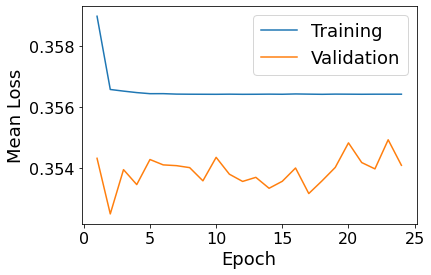

Mean validation lost of the last 5 epochs = 0.3544112645527896


2021-09-23T00:08oresnet18_lr=0.0001_trl=4
{'network': 'ResnetOriginal', 'optimizer': 'Adam', 'adam_regul_factor': 0.0001, 'batch_size': 64, 'learning_rate': 0.0001, 'loss': 'BCELoss', 'use_lr_scheduler': True, 'type': 'resnet18', 'shapes': [512, 128, 14], 'trainable_resnet': True, 'trainable_level': 4, 'batches_per_obs': 300}
Total number of epochs:  24


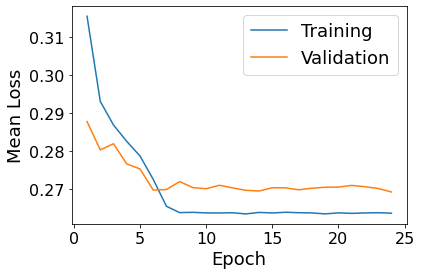

Mean validation lost of the last 5 epochs = 0.270342089761706


2021-09-23T00:09oresnet18_lr=0.0001_trl=6
{'network': 'ResnetOriginal', 'optimizer': 'Adam', 'adam_regul_factor': 0.0001, 'batch_size': 64, 'learning_rate': 0.0001, 'loss': 'BCELoss', 'use_lr_scheduler': True, 'type': 'resnet18', 'shapes': [512, 128, 14], 'trainable_resnet': True, 'trainable_level': 6, 'batches_per_obs': 300}
Total number of epochs:  24


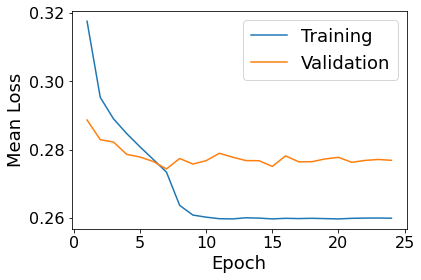

Mean validation lost of the last 5 epochs = 0.2769888152094448


2021-09-22T23:59_oresnet18_lr=0.0001_less_fc
{'network': 'ResnetOriginal', 'optimizer': 'Adam', 'adam_regul_factor': 0.0001, 'batch_size': 64, 'learning_rate': 0.0001, 'loss': 'BCELoss', 'use_lr_scheduler': True, 'type': 'resnet18', 'shapes': [512, 14], 'trainable_resnet': True, 'trainable_level': 0, 'batches_per_obs': 300}
Total number of epochs:  24


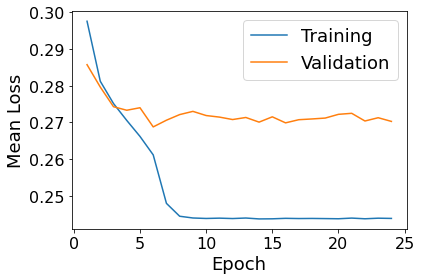

Mean validation lost of the last 5 epochs = 0.27129716233295553


2021-09-22T15:46oresnet18_lr=0.0001
{'network': 'ResnetOriginal', 'optimizer': 'Adam', 'adam_regul_factor': 0.0001, 'batch_size': 64, 'learning_rate': 0.0001, 'loss': 'BCELoss', 'use_lr_scheduler': True, 'type': 'resnet18', 'shapes': [512, 128, 14], 'trainable_resnet': True, 'trainable_level': 0, 'batches_per_obs': 300}
Total number of epochs:  24


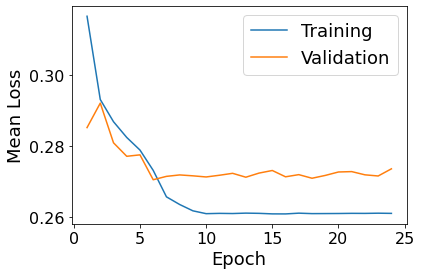

Mean validation lost of the last 5 epochs = 0.27255318830995




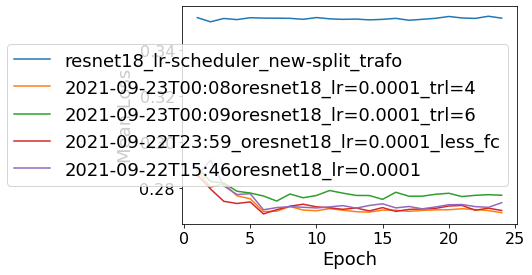

In [76]:
save_image = False

val_loss = {}

for sel_json in widget.value:
    name = sel_json.replace("_net_config.json", "")
    print(name)
    path = os.path.join(parent, name)
    print_network_config(path)
    loss, loss_val = load_losses(path)
    val_loss[name] = loss_val
    plot_loss(loss, loss_val, save_image)
    print_last_loss_vals(loss_val, last_epochs=5)
    print()
    print()

plot_overlaid_val_losses(val_loss)